In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATASET_PATH = "/home/vineet/datasets/rock-paper-scissors-dataset/Rock-Paper-Scissors/"

In [3]:
TRAIN_PATH = DATASET_PATH + "train/"
TEST_PATH = DATASET_PATH + "test/"
VALIDATION_PATH = DATASET_PATH + "validation/"

In [4]:
CLASS_NAMES = ['paper', 'rock', 'scissors']

### Image Loaging and Augmentation Functions

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=90,
    height_shift_range=0.1,
    width_shift_range=0.1,
    zoom_range=0.1
)

test_generator = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.7
)

In [6]:
train_images = train_generator.flow_from_directory(
    TRAIN_PATH,
    target_size=(128, 128),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=64,
    shuffle=True,
    seed=42
)

val_images = test_generator.flow_from_directory(
    TEST_PATH,
    target_size=(128, 128),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=64,
    shuffle=True,
    seed=42,
    subset='training'
)


test_images = test_generator.flow_from_directory(
    TEST_PATH,
    target_size=(128, 128),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=64,
    shuffle=False,
    seed=42,
    subset='validation'
)

Found 2520 images belonging to 3 classes.
Found 114 images belonging to 3 classes.
Found 258 images belonging to 3 classes.


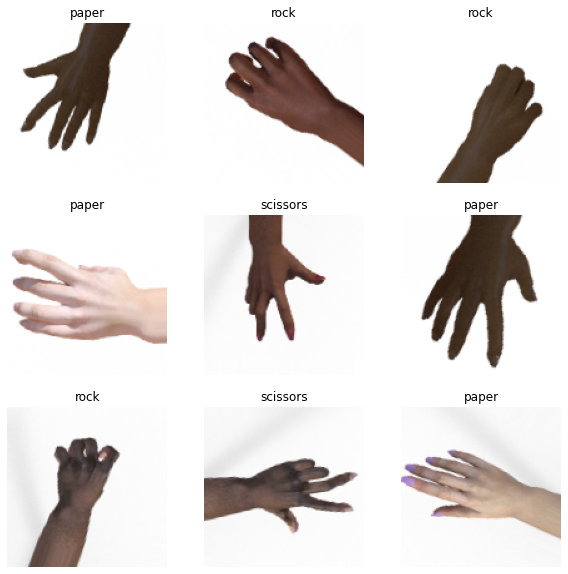

In [7]:
plt.figure(figsize=(10, 10))

images, labels = train_images.next()
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(CLASS_NAMES[labels[i].argmax()])
    plt.axis('off')

plt.show()

### Model Generation

In [8]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D

def get_model_1(img_shape: tuple):
    inputs = tf.keras. Input(shape=img_shape)
    # Conv Block 1
    x = Conv2D(32, (3, 3), activation='relu', padding="same")(inputs)
    x = Conv2D(32, (3, 3), activation='relu', padding="same")(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    # Conv Block 2
    x = Conv2D(64, (3, 3), activation='relu', padding="same")(x)
    x = Conv2D(64, (3, 3), activation='relu', padding="same")(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    # Conv Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding="same")(x)
    x = Conv2D(128, (3, 3), activation='relu', padding="same")(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    # Conv Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding="same")(x)
    x = Conv2D(256, (3, 3), activation='relu', padding="same")(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    # Conv Block 4
    x = Conv2D(256, (3, 3), activation='relu', padding="same")(x)
    x = Conv2D(256, (3, 3), activation='relu', padding="same")(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = GlobalAveragePooling2D()(x)
    #flatten
    x = Flatten()(x)
    x = Dropout(0.3)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.3)(x)

    output = Dense(3, activation='softmax')(x)
    model = tf.keras.Model(inputs=inputs, outputs=output)
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model
    

In [9]:
def get_model_2(img_shape):
    inputs = tf.keras.Input(shape=img_shape)
    # Conv Block 1
    x = Conv2D(32, (3, 3), activation='relu', padding="same")(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D()(x)
     # Conv Block 2
    x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding="same")(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D()(x)
    # Conv Block 3
    x = Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding="same")(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D()(x)
    # Conv Block 4
    x = Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding="same")(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D()(x)
    # Flatten
    x = Flatten()(x)
    x = Dropout(0.4)(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.4)(x)
    x = Dense(32, activation='relu')(x)
    outputs = Dense(3, activation='softmax')(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [10]:
px = (128, 128)
chanels = 3

model = get_model_1((*px, chanels))
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496 

2022-06-07 10:01:30.783102: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-07 10:01:30.803676: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-07 10:01:30.803804: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-07 10:01:30.804087: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the 

In [11]:
# Early stopping
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10)

In [12]:
history = model.fit(train_images, epochs=50, validation_data=val_images, callbacks=[es])

Epoch 1/50


2022-06-07 10:01:32.638451: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8201
2022-06-07 10:01:33.229403: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-06-07 10:01:33.229866: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-06-07 10:01:33.229878: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-06-07 10:01:33.230345: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-06-07 10:01:33.230381: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2022-06-07 10:01:33.916374: I tensorflow/stream_executor/cuda/c

40/40 [==============================] - 11s 197ms/step - loss: 0.7633 - accuracy: 0.6599 - val_loss: 7.9240 - val_accuracy: 0.3333
Epoch 2/50
40/40 [==============================] - 7s 183ms/step - loss: 0.2358 - accuracy: 0.9151 - val_loss: 8.7226 - val_accuracy: 0.3333
Epoch 3/50
40/40 [==============================] - 7s 183ms/step - loss: 0.1487 - accuracy: 0.9516 - val_loss: 4.0879 - val_accuracy: 0.3333
Epoch 4/50
40/40 [==============================] - 7s 183ms/step - loss: 0.1122 - accuracy: 0.9611 - val_loss: 7.0257 - val_accuracy: 0.3333
Epoch 5/50
40/40 [==============================] - 7s 182ms/step - loss: 0.1002 - accuracy: 0.9683 - val_loss: 7.8577 - val_accuracy: 0.3333
Epoch 6/50
12/40 [========>.....................] - ETA: 4s - loss: 0.0614 - accuracy: 0.9808

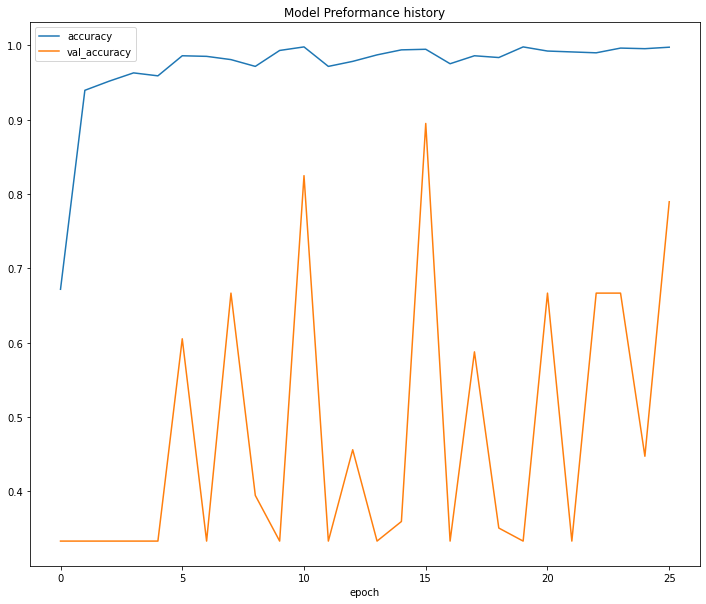

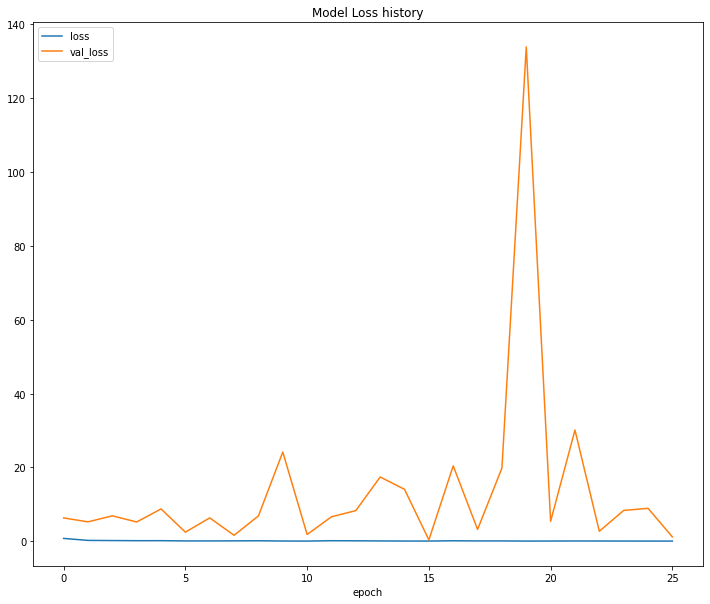

In [ ]:
plt.figure(figsize=(12,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
    
plt.title('Model Preformance history')
plt.xlabel('epoch')
plt.legend(["accuracy", "val_accuracy"], loc='upper left')


plt.figure(figsize=(12,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
    
plt.title('Model Loss history')
plt.xlabel('epoch')
plt.legend(["loss", "val_loss"], loc='upper left')



plt.show()

In [ ]:
model.evaluate(test_images)

5/5 [==============================] - 0s 80ms/step - loss: 1.4519 - accuracy: 0.7984


[1.4519234895706177, 0.7984496355056763]

In [ ]:
# compare the test set predictions with the actual labels
actual = test_images.labels
fuzzy_predictions = model.predict(test_images)
predictions = np.argmax(fuzzy_predictions, axis=1)


<AxesSubplot:>

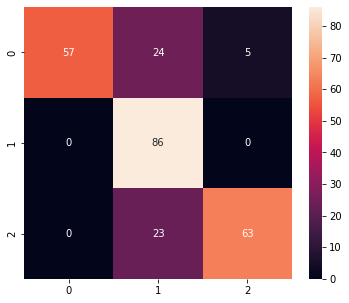

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

conf_matrix = confusion_matrix(actual, predictions)
# plt heatmap
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d')

In [ ]:
clf_report = classification_report(actual, predictions)
print(clf_report)

              precision    recall  f1-score   support

           0       1.00      0.66      0.80        86
           1       0.65      1.00      0.79        86
           2       0.93      0.73      0.82        86

    accuracy                           0.80       258
   macro avg       0.86      0.80      0.80       258
weighted avg       0.86      0.80      0.80       258



In [ ]:
# save the model
model.save('model_2.h5')

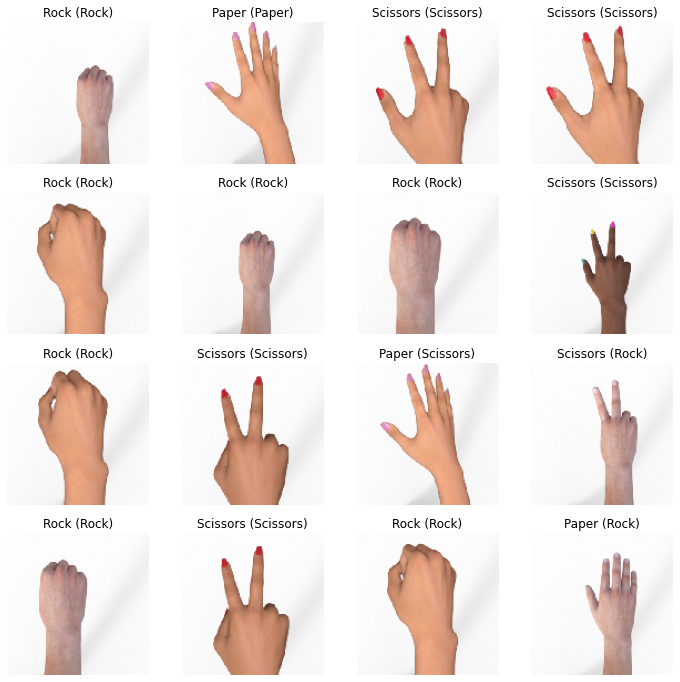

In [ ]:
test_images.batch_size = 16
test_images.reset()
test_images.shuffle = True

images, labels = test_images.next()
pred = model.predict(images)
pred_class = np.argmax(pred, axis=1)

plt.figure(figsize=(12, 12))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[i])
    title = f"{CLASS_NAMES[labels[i].argmax()].title()} ({CLASS_NAMES[pred_class[i]].title()})"
    plt.title(title)
    plt.axis('off')

plt.show() 